## HT-ATES potential in the Netherlands

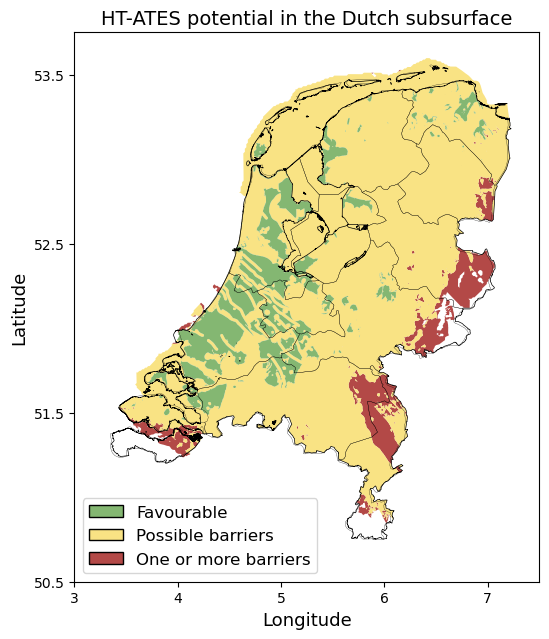

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from cmcrameri import cm
import numpy as np

# Load the HT-ATES potential data
gdf = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/data/TNO-HT-ATES/HT-ATES-potential/-Total_Netherlands.shp")

# Set the current CRS (RD New)
gdf = gdf.set_crs(epsg=28992)
# Reproject to lat/lon
gdf = gdf.to_crs(epsg=4326)

# Color and label mappings
color_map = {
    1000: cm.lajolla(0.4),      # One or more barriers
    2000: cm.lajolla(0.9),   # Possible barriers
    3000: cm.imola(0.7),    # Favourable
    0: 'white'        # Excluded / unknown
}
label_map = {
    1000: 'One or more barriers',
    2000: 'Possible barriers',
    3000: 'Favourable',
    0: 'Excluded / unknown'
}

# Add color and label columns
gdf['color'] = gdf['DN'].map(color_map)
gdf['label'] = gdf['DN'].map(label_map)

# Load Netherlands outline (already in EPSG:4326) 
countries = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
netherlands = countries[countries['NAME'] == "Netherlands"]
admin = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
provinces = admin[admin['admin'] == "Netherlands"]
provinces = provinces.to_crs(epsg=4326)
netherlands = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/NL_borders25.geojson")
netherlands = netherlands.to_crs(epsg=4326)

# Plotting
fig, ax = plt.subplots(figsize=(6, 8)) #, dpi=400

# Plot Netherlands border first
netherlands.boundary.plot(ax=ax, color='black', linewidth=0.5)
provinces.boundary.plot(ax=ax, color='black', linewidth=0.2)

# Plot potential areas
for dn_value in sorted(gdf['DN'].unique()):
    subset = gdf[gdf['DN'] == dn_value]
    subset.plot(ax=ax, color=color_map[dn_value])

legend_elements = [
    Patch(facecolor=cm.imola(0.7), edgecolor='black', label='Favourable'),
    Patch(facecolor=cm.lajolla(0.9), edgecolor='black', label='Possible barriers'),
    Patch(facecolor=cm.lajolla(0.4), edgecolor='black', label='One or more barriers')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=12)

ax.set_title("HT-ATES potential in the Dutch subsurface", fontsize=14)
ax.set_ylim(50.5,53.75)
ax.set_xlim(3,7.5)
ax.set_yticks(np.arange(50.5,54,1))
ax.set_xticks(np.arange(3, 7.5,1))
ax.set_xlabel("Longitude", fontsize=13)
ax.set_ylabel("Latitude", fontsize=13)
plt.show()

## District heating areas

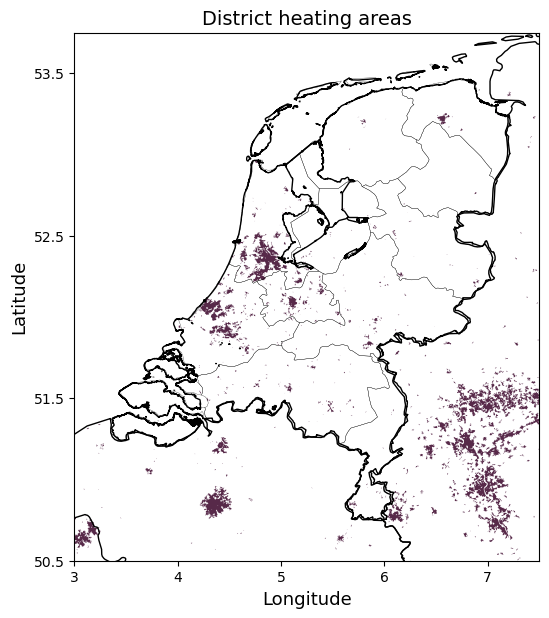

In [4]:
import matplotlib.pyplot as plt
from cmcrameri import cm
import numpy as np

dh = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/data/dh_areas.gpkg")
dh = dh.to_crs(epsg=4326)

# Load Netherlands and project to raster CRS
netherlandsoutline = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/NL_borders25.geojson")
admin = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
netherlands = admin[admin['admin'] == "Netherlands"]
netherlands = netherlands.to_crs(epsg=4326)
netherlandsoutline = netherlandsoutline.to_crs(epsg=4326)
germany = countries[countries['NAME'] == "Germany"]
germany = germany.to_crs(epsg=4326)
belgium = countries[countries['NAME'] == "Belgium"]
belgium = belgium.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(6, 8)) #, dpi=400
dh.plot(ax=ax, color=cm.managua(0.5))
netherlands.boundary.plot(ax=ax, color='black', linewidth=0.2)
netherlandsoutline.boundary.plot(ax=ax, color='black', linewidth=1)
germany.boundary.plot(ax=ax, color='black', linewidth=1)
belgium.boundary.plot(ax=ax, color='black', linewidth=1)
ax.set_ylim(50.5,53.75)
ax.set_xlim(3,7.5)
ax.set_yticks(np.arange(50.5,54,1))
ax.set_xticks(np.arange(3, 7.5,1))
ax.set_xlabel("Longitude", fontsize=13)
ax.set_ylabel("Latitude", fontsize=13)
plt.title("District heating areas", fontsize=14)
plt.show()

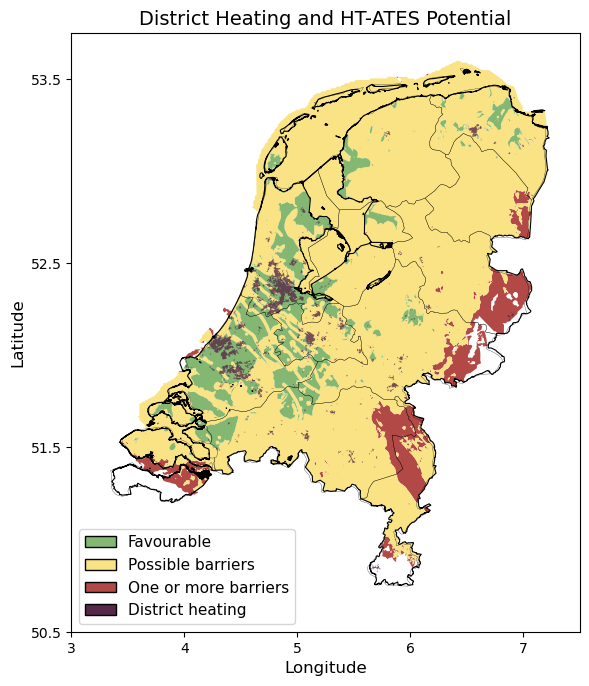

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from cmcrameri import cm
import numpy as np

# Load and prepare HT-ATES
gdf = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/data/TNO-HT-ATES/HT-ATES-potential/-Total_Netherlands.shp")
gdf = gdf.set_crs(epsg=28992).to_crs(epsg=4326)
color_map = {
    1000: cm.lajolla(0.4),     
    2000: cm.lajolla(0.9),      
    3000: cm.imola(0.7),        
    0: 'white'                  
}
label_map = {
    1000: 'One or more barriers',
    2000: 'Possible barriers',
    3000: 'Favourable',
    0: 'Excluded / unknown'
}
gdf['color'] = gdf['DN'].map(color_map)

# Load district heating
dh = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/data/dh_areas.gpkg")
dh = dh.to_crs(epsg=4326)

# Load Netherlands outline and provinces
admin = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
provinces = admin[admin['admin'] == "Netherlands"].to_crs(epsg=4326)
netherlands = gpd.read_file("C:/Users/Johannes/PypsaProject/pypsa-eur-htates/Notebooks/NL_borders25.geojson").to_crs(epsg=4326)

# Overlay district heating with the Netherlands outline
dh_clipped = gpd.overlay(dh, netherlands, how='intersection')

# Plotting
fig, ax = plt.subplots(figsize=(6, 8))  # dpi=400 for higher resolution
# HT-ATES potential areas
for dn_value in sorted(gdf['DN'].unique()):
    subset = gdf[gdf['DN'] == dn_value]
    subset.plot(ax=ax, color=color_map[dn_value], linewidth=0)
# District heating areas
dh_clipped.plot(ax=ax, color=cm.managua(0.5), alpha=0.8)
# Add borders
provinces.boundary.plot(ax=ax, color='black', linewidth=0.2)
netherlands.boundary.plot(ax=ax, color='black', linewidth=0.8)

legend_elements = [
    Patch(facecolor=cm.imola(0.7), edgecolor='black', label='Favourable'),
    Patch(facecolor=cm.lajolla(0.9), edgecolor='black', label='Possible barriers'),
    Patch(facecolor=cm.lajolla(0.4), edgecolor='black', label='One or more barriers'),
    Patch(facecolor=cm.managua(0.5), edgecolor='black', label='District heating')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=11)
ax.set_title("District Heating and HT-ATES Potential", fontsize=14)
ax.set_ylim(50.5, 53.75)
ax.set_xlim(3, 7.5)
ax.set_yticks(np.arange(50.5, 54, 1))
ax.set_xticks(np.arange(3, 7.5, 1))
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.tight_layout()
plt.show()